In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import itertools
import time
from tqdm import tqdm
import sympy as sp
x = sp.var('x')
from sympy import Symbol
from sympy.solvers import solve
import math
import matplotlib.pyplot as plt
import collections

import warnings
warnings.filterwarnings("ignore")

# Import our adaptive module:
from adaptive_MDP import Adaptive
from adaptive_MDP import Adaptive_New
from non_adaptive import NonAdaptive
import poly_utils

# Import Markov Decision Module
import MDP

### Some experiments and general conclusions

In [56]:
# ================================================== #

# Initial parameters (Example from Fenichel et al):
mu = 0
gamma = 0.1823
beta = 0.0925
phi = 0

# R values:
Rmu = mu/(mu+ gamma)
Rphi = phi/(mu + gamma)

### Adaptive parameters

# Quadratic Utility functions:

b_s = 10 # Making the max utility attained at b_s/2 
b_i = 6.67 # Making the max utility attained at b_i/2 
b_z = 10 # Making the max utility attained at b_z/2 
a_s = 0
a_i = 1.826
a_z = 0
nu = 0.25
tau = 12
delta = 0.99986

# ================================================== #

# Immediate rewards: (Utility functions)
def u_s(a):
    return (b_s*a - a**2)**nu - a_s
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

### Simulation parameters
t_max = 150
steps = 100
x00 = [9999, 1, 0]

Here we are using utility functions of the form:

$$
u_h(a) = (b_h\cdot a - a^2)^{\nu} - a_h.
$$

In [10]:
# Initialize adaptive instances
instance_adaptive = Adaptive_New(
    mu, gamma, beta, phi,
    tau, delta,
    u_s, u_i, u_z,
    t_max, steps, x00, max_contacts=30,
    logs=False, verbose=False)
instance_adaptive.patch_uni_solutions()

Patching unit time solutions ...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:15<00:00,  9.47it/s]


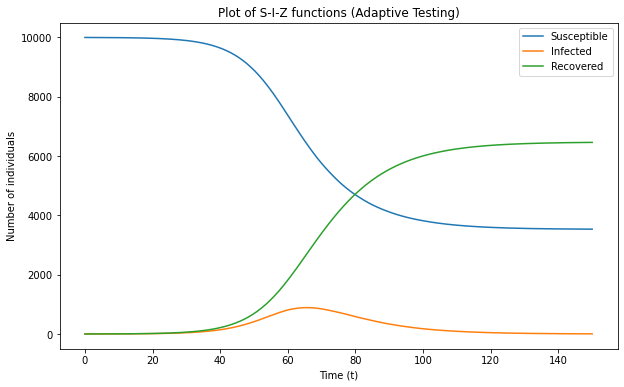

In [13]:
t = np.linspace(0, instance_adaptive.t_max, len(instance_adaptive.S))
instance_adaptive.plot_ode_solution(t = t, title = 'Adaptive Testing')

Plotting $C^{s*}$ history.

A min of 3.6363636363636367 contacts for susceptible.


100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 12157.87it/s]


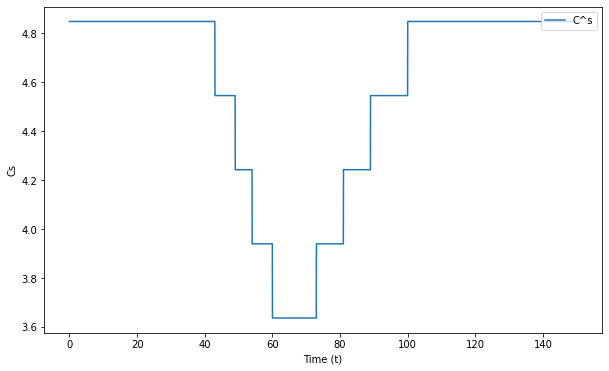

In [14]:
print(f"A min of {np.nanmin(instance_adaptive.cs_history)} contacts for susceptible.")
instance_adaptive.plot_C(instance_adaptive.cs_history) # Could add ci_history or cz_history.

Plotting the final V(s) found at each MDP per time.

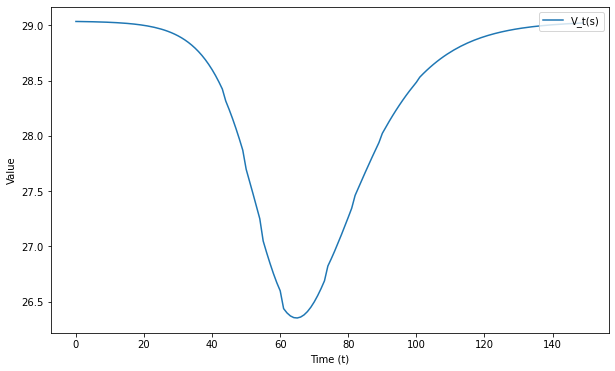

In [16]:
v1 = [instance_adaptive.val_func_vals[t][0][0] for t in range(t_max)]
v2 = [instance_adaptive.val_func_vals[t][1][0] for t in range(t_max)]
v = [v1[i] - v2[i] for i in range(len(v1))]
plt.plot(range(len(v1)), v1, label="V_t(s)")
# plt.plot(range(len(v2)), v2, label="V_t(i)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

Plotting $(V(s), V(i))$ at a particular MDP:

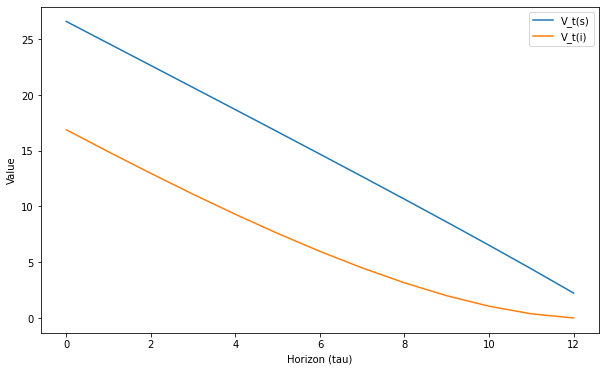

In [21]:
t = 60
v1 = instance_adaptive.val_func_vals[t][0] 
v2 = instance_adaptive.val_func_vals[t][1]
plt.plot(range(len(v1)), v1, label="V_t(s)")
plt.plot(range(len(v2)), v2, label="V_t(i)")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

Increasing $\tau$, the horizon, brings $V(s)$ closer to $V(i)$ and increases the value of the final $C^s$ achieved:

Patching unit time solutions ...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.52it/s]


A min of 4.242424242424242 contacts for susceptible.


100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 25881.18it/s]


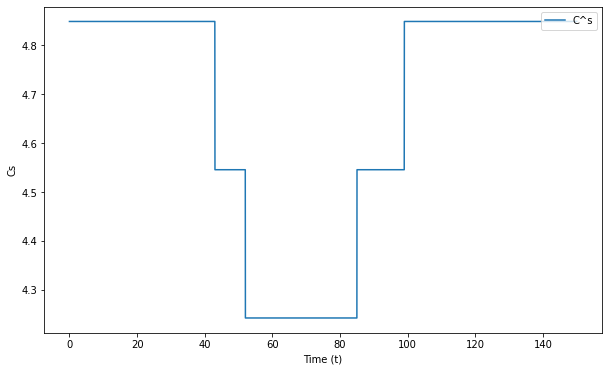

In [22]:
tau = 36
# Initialize adaptive instances
instance_adaptive = Adaptive_New(
    mu, gamma, beta, phi,
    tau, delta,
    u_s, u_i, u_z,
    t_max, steps, x00, max_contacts=30,
    logs=False, verbose=False)
instance_adaptive.patch_uni_solutions()

print(f"A min of {np.nanmin(instance_adaptive.cs_history)} contacts for susceptible.")
instance_adaptive.plot_C(instance_adaptive.cs_history) # Could add ci_history or cz_history.

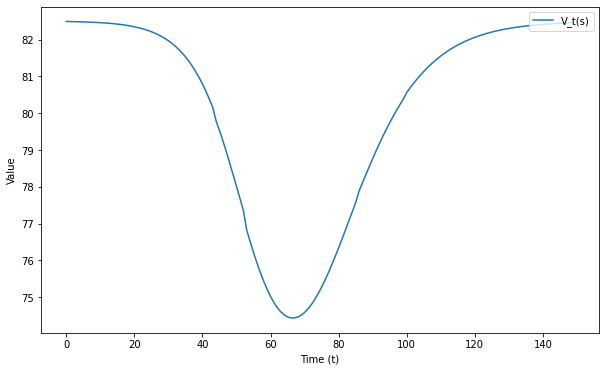

In [23]:
v1 = [instance_adaptive.val_func_vals[t][0][0] for t in range(t_max)]
v2 = [instance_adaptive.val_func_vals[t][1][0] for t in range(t_max)]
v = [v1[i] - v2[i] for i in range(len(v1))]
plt.plot(range(len(v1)), v1, label="V_t(s)")
# plt.plot(range(len(v2)), v2, label="V_t(i)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

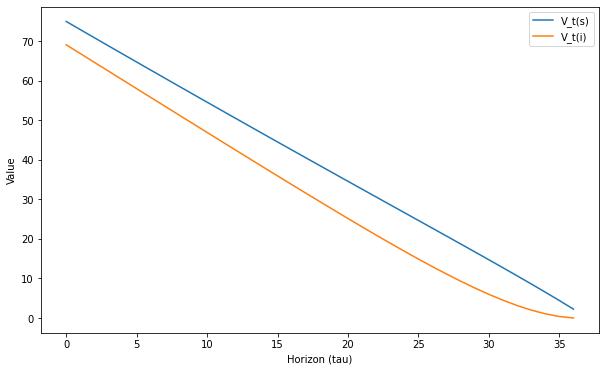

In [24]:
t = 60
v1 = instance_adaptive.val_func_vals[t][0] 
v2 = instance_adaptive.val_func_vals[t][1]
plt.plot(range(len(v1)), v1, label="V_t(s)")
plt.plot(range(len(v2)), v2, label="V_t(i)")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

This is an observation made in Fenichel et.al.

In [ ]:
taus = range(1, 40, 2)
min_cts_list = []
peak_prevs = []
for tau in taus:
    print(tau)
    # Initialize adaptive instances
    instance_adaptive = Adaptive_New(
        mu, gamma, beta, phi,
        tau, delta,
        u_s, u_i, u_z,
        t_max, steps, x00, max_contacts=30,
        logs=False, verbose=False)
    instance_adaptive.patch_uni_solutions()
    min_cts_s = np.nanmin(instance_adaptive.cs_history)
    min_cts_list.append(min_cts_s)
    peak_prevs.append(np.nanmax(instance_adaptive.I))

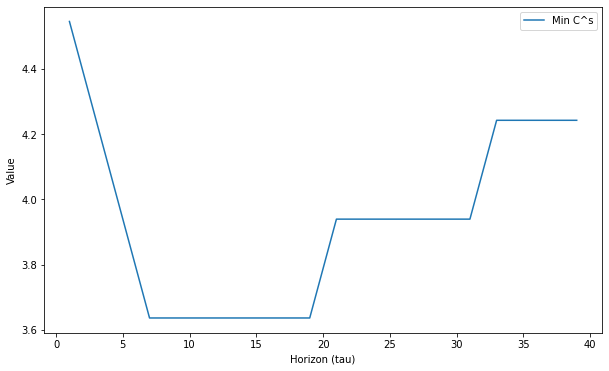

In [59]:
plt.plot(taus, min_cts_list, label="Min C^s")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

However, it depends on the utility functions used.

In [60]:
b_s = 10 # Making the max utility attained at b_s/2 
b_i = 6.67 # Making the max utility attained at b_i/2 
b_z = 10 # Making the max utility attained at b_z/2 
a_s = 0
a_i = 0 # Change this <==============================
a_z = 0
nu = 0.25
tau = 12
delta = 0.99986

# ================================================== #

# Immediate rewards: (Utility functions)
def u_s(a):
    return (b_s*a - a**2)**nu - a_s
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

In [ ]:
taus = range(1, 40, 2)
min_cts_list = []
peak_prevs = []
for tau in taus:
    print(tau)
    # Initialize adaptive instances
    instance_adaptive = Adaptive_New(
        mu, gamma, beta, phi,
        tau, delta,
        u_s, u_i, u_z,
        t_max, steps, x00, max_contacts=30,
        logs=False, verbose=False)
    instance_adaptive.patch_uni_solutions()
    min_cts_s = np.nanmin(instance_adaptive.cs_history)
    min_cts_list.append(min_cts_s)
    peak_prevs.append(np.nanmax(instance_adaptive.I))

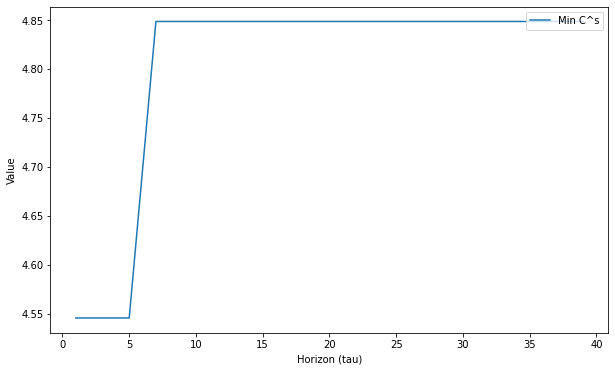

In [63]:
plt.plot(taus, min_cts_list, label="Min C^s")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

#### Using different Utility functions:

In [ ]:
b_s = 10 # Making the max utility attained at b_s/2 
b_i = 6.67 # Making the max utility attained at b_i/2 
b_z = 10 # Making the max utility attained at b_z/2 
a_s = 0
a_i = 1.8263 # Change this <==============================
a_z = 0
nu = 0.25
tau = 12
delta = 0.99986

# ================================================== #

# Immediate rewards: (Utility functions)
def u_s(a):
    return (b_s*a - a**2)**nu - a_s
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

In [ ]:
# ================================================== #

# # Initial parameters (Our example):
# mu = 0.00015
# gamma = 0.0027
# beta = 0.096
# phi = 0.0044

# # R values:
# Rmu = mu/(mu+ gamma)
# Rphi = phi/(mu + gamma)

# ### Adaptive parameters

# # Quadratic Utility functions:

# b_s = 24 # Making the max utility attained at b_s/2 
# b_i = 20 # Making the max utility attained at b_i/2 
# b_z = 24 # Making the max utility attained at b_z/2 
# a_s = 0
# a_i = 1.28
# a_z = 0
# nu = 0.25
# tau = 12
# delta = 0.9986

In [ ]:
xt0 = [6000, 2000, 2000]
states = [0, 1, 2]
actions = instance_adaptive.actions
horizon = 40
delta = instance_adaptive.delta

cs_star, ci_star, cz_star = instance_adaptive.cs_max, instance_adaptive.ci_max, instance_adaptive.cz_max

# Transition Probabilities:
def P_si(a):
    phi_t = xt0[0]*cs_star + xt0[1]*ci_star + xt0[2]*cz_star
    P_it = 1 - math.exp(-1*(instance_adaptive.beta*ci_star*xt0[1]*a)/phi_t)
    return P_it

def P_ss(a):
    return 1 - P_si(a)

def P_sz(a):
    return 0

def P_is(a):
    return 0

def P_ii(a):
    return math.exp(-1*instance_adaptive.gamma)

def P_iz(a):
    return 1 - math.exp(-1*instance_adaptive.gamma)

# No reinfection: (Important) #
def P_zs(a):
    return 0

def P_zi(a):
    if instance_adaptive.phi == 0:
        return 0
    return P_si(a)*0.97

def P_zz(a):
    return 1 - P_zi(a)

trans_prob_mat = np.array([
    [P_ss, P_si, P_sz],
    [P_is, P_ii, P_iz],
    [P_zs, P_zi, P_zz]
])

reward_vector = np.array([instance_adaptive.u_s, instance_adaptive.u_i, instance_adaptive.u_z])
trans_probs = [trans_prob_mat]*horizon
rewards = [reward_vector]*horizon

In [ ]:
"""
Initialization point for MDP process
"""

init_point_use = [0,0,0]

# Use a Markov Decision Process with finite horizon to obta_in the optimal policy and decision.
MDP_adaptive = MDP.MDP(states, actions, rewards, trans_probs, horizon, delta,
                       logger=instance_adaptive.logger, verbose=instance_adaptive.verbose)
MDP_adaptive.fit_optimal_values(init_point=init_point_use)

val_hist = MDP_adaptive.values_history
# val_hist[0].reverse()
# val_hist[1].reverse()
# val_hist[2].reverse()

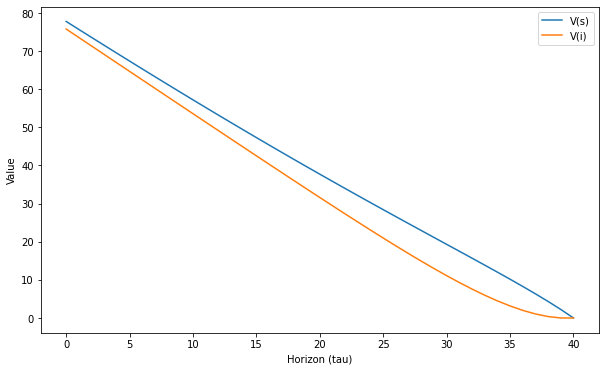

In [ ]:
plt.plot(range(len(val_hist[0])), val_hist[0], label="V(s)")
plt.plot(range(len(val_hist[1])), val_hist[1], label="V(i)")
# plt.plot(range(len(val_hist[2])), val_hist[2], label="V(z)")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [282]:
policies = []
x = [0,0,0]

x_history = [[x[h]] for h in states]
horizon2 = 20

for t in range(horizon2):

    reward_step = rewards[t] #This is the vector with entries u_h^t(a) for h in S
    probs_step = trans_probs[t] # This is matrix with entries P_{hk}^t(a) for h,k in S

    all_prob_matrices = []
    for a in actions:
        probs_matrix = probs_step[0,1](a)
        all_prob_matrices.append(probs_matrix)

    policies_step = {}
    vals = []

    for h in range(3):

        rwrds = [reward_step[h](a) for a in actions]
        val_funcs = [delta*sum([probs_step[h,k](a)*x[k] for k in range(3)]) for a in actions]

        values = [reward_step[h](a) + delta*sum([probs_step[h,k](a)*x[k] for k in range(3)]) for a in actions]

        max_val = np.nanmax(np.array(values))
        max_arg = actions[values.index(max_val)]

        vals.append(max_val)
        policies_step[h] = max_arg

    x = np.array(vals)

    for h in states:
        x_history[h].insert(0,x[h])

    policies.append(policies_step)

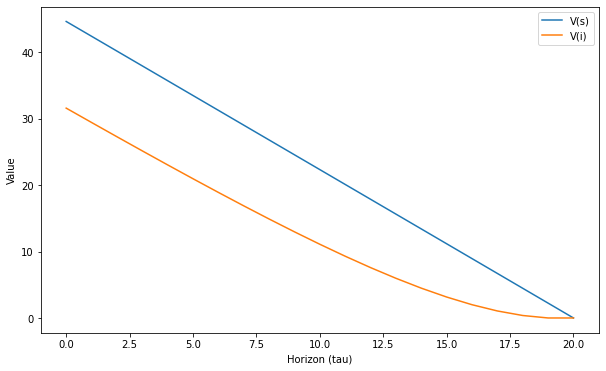

In [283]:
plt.plot(range(len(x_history[0])), x_history[0], label="V(s)")
plt.plot(range(len(x_history[1])), x_history[1], label="V(i)")
plt.xlabel("Horizon (tau)")
plt.ylabel("Value")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()